In [57]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statistics as stat

In [3]:
data=pd.read_csv("StudentsPerformance.csv")
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [26]:
data.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


# Find out how many males and females participated in the test

In [5]:
Gender=data["gender"].value_counts()
Gender

female    518
male      482
Name: gender, dtype: int64

# What do you think about the students' parental level of education?

In [25]:
edu=data["parental level of education"].value_counts(normalize=True).mul(100).round(1)
print("The percentage of parental education of students\n", edu)

The percentage of parental education of students
 some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: parental level of education, dtype: float64


<AxesSubplot:>

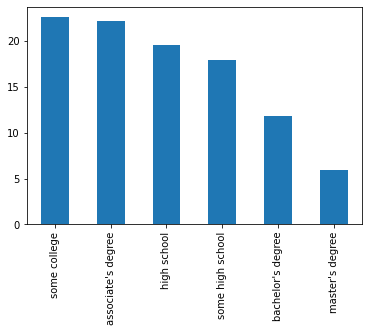

In [22]:
edu.plot(kind='bar')

The percentage distribution of parental education is given above. Those with masters degree and bachelors degree are less. 

# Who scores the most on average for math, reading and writing based on Gender and test preparation course

In [30]:
data[['gender','math score','writing score',
      'reading score']].groupby(['gender']).agg('mean')

,math score,writing score,reading score
gender,,,
female,63.376448,72.467181,72.590734
male,68.821577,63.446058,65.545643


Females scored the highest on average in math, writing and reading.

In [32]:
data[['test preparation course','math score','writing score',
      'reading score']].groupby(['test preparation course']).agg('mean')

,math score,writing score,reading score
test preparation course,,,
completed,69.96648,74.684358,74.175978
none,63.78972,64.457944,66.417445


Students with test preparation course scored the highest on average in math, reading and writing.

# What do you think about the scoring variation for math, reading and writing based on Gender & Test preparation course

In [34]:
data[['gender','math score','writing score',
      'reading score']].groupby(['gender']).std()

,math score,writing score,reading score
gender,,,
female,16.029928,14.844842,14.411018
male,14.556411,14.227225,14.149594


Females have more scoring variation for math, reading and writing

In [35]:
data[['test preparation course','math score','writing score',
      'reading score']].groupby(['test preparation course']).std()

,math score,writing score,reading score
test preparation course,,,
completed,14.521847,13.236412,13.537572
none,15.705689,15.041667,14.608896


Those students with no test preparation course have more scoring variation for math, reading and writing.

# The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.

In [52]:
Math_sort = data.sort_values(by=['math score'], ascending=False)stats
Math_sort

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,male,group E,bachelor's degree,standard,completed,100,100,100
996,male,group A,some college,standard,completed,100,96,86
515,female,group E,some college,standard,none,100,92,97
517,female,group E,associate's degree,standard,none,100,100,100
516,female,group E,bachelor's degree,standard,none,100,100,100
...,...,...,...,...,...,...,...,...
2,female,group B,some high school,free/reduced,none,18,32,28
51,female,group C,some high school,free/reduced,none,13,41,51
3,female,group B,some college,standard,none,11,38,32
1,female,group B,high school,free/reduced,none,8,24,23


In [62]:
np.percentile(Math_sort['math score'],[.25])


array([11.995])

In [63]:
Math_sort.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


The data can be sorted and the first 25 percentile can be calculated.( There should hopefully be a better function/way to do this)